# 01 Extract XY Coordinates

Vector data is commonly provided as ``shape`` files. These files can be loaded with ``GeoPandas`` as ``GeoDataFrames``. Each geometry object is stored as ``shapely`` object within the ``GeoSeries`` ``geometry`` of the ``GeoDataFrames``. The basic ``shapely`` objects used here are:

* Points/Multi-Points
* Lines/Multi-Lines
* Polygons/Multi-Polygons

The first step is to load the data using ``GeoPandas``. We can inspect the different columns of the GeoDataFrame by looking at its head. In the following examples for point, line and polygon data, we have an ``id`` column which was created during the digitalizing of the data in QGIS, a formation column containing the name of a geological unit (this becomes important later for the actual modeling) and most importantly the geometry column consisting of the ``shapely`` geometry objects. The X and Y coordinates of the different geometry objects can then be extracted using ``extract_xy()`` of the GemGIS vector module.

<img src="../images/tutorial01_cover.png">


## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/01_extract_xy/'

## Point Data

The point data stored as shape file will be loaded as GeoDataFrame. 

In [2]:
import geopandas as gpd
import gemgis as gg

gdf = gpd.read_file(file_path + 'interfaces_points.shp')

gdf.head()

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


The resulting GeoDataFrame has now an additional ``X`` and ``Y`` column containing the coordinates of the point objects. These can now be easily used for further processing. The geometry types of the shapely objects remained unchanged. The ``id`` column was dropped by default.


In [3]:
gdf_xy = gg.vector.extract_xy(gdf=gdf)

gdf_xy.head()

,formation,geometry,X,Y
0,Ton,POINT (19.150 293.313),19.15,293.31
1,Ton,POINT (61.934 381.459),61.93,381.46
2,Ton,POINT (109.358 480.946),109.36,480.95
3,Ton,POINT (157.812 615.999),157.81,616.00
4,Ton,POINT (191.318 719.094),191.32,719.09


The figures below show the original point data and the extracted X and Y data.

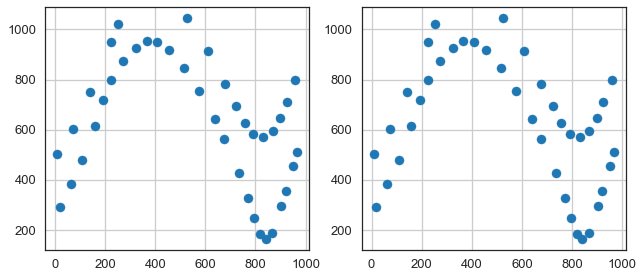

In [4]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, aspect='equal')
ax1.grid()

gdf_xy.plot(ax=ax2, aspect='equal')
ax2.grid()

## Line Data

The line data stored as shape file will be loaded as GeoDataFrame. 

In [5]:
import geopandas as gpd
import gemgis as gg

gdf = gpd.read_file(file_path + 'interfaces_lines.shp')

gdf.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


The resulting GeoDataFrame has now an additional ``X`` and ``Y`` column. These values represent the single vertices of each LineString. The geometry types of the shapely objects in the GeoDataFrame were converted from LineStrings to Points to match the X and Y column data. The ``id`` column was dropped by default. The index of the new GeoDataFrame was reset.


In [6]:
gdf_xy = gg.vector.extract_xy(gdf=gdf)

gdf_xy.head()

,formation,geometry,X,Y
0,Sand1,POINT (0.256 264.862),0.26,264.86
1,Sand1,POINT (10.593 276.734),10.59,276.73
2,Sand1,POINT (17.135 289.090),17.13,289.09
3,Sand1,POINT (19.150 293.313),19.15,293.31
4,Sand1,POINT (27.795 310.572),27.80,310.57


The figures below show the original line data and the extracted point data with the respective X and Y data.


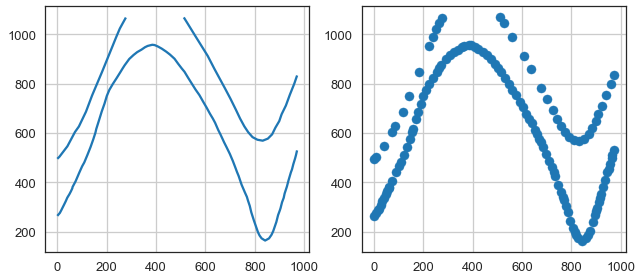

In [7]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, aspect='equal')
ax1.grid()

gdf_xy.plot(ax=ax2, aspect='equal')
ax2.grid()

The coordinates of LineStrings in a GeoDataFrame can also be extracted and are stored as lists in respective X and Y columns using ``extract_xy_linestring(..)``.

In [8]:
gdf_xy = gg.vector.extract_xy_linestring(gdf=gdf)
gdf_xy

,id,formation,geometry,X,Y
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17....","[0.256327195431048, 10.59346813871597, 17.1349...","[264.86214748436396, 276.73370778641777, 289.0..."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0...","[0.1881868620686138, 8.840672956663411, 41.092...","[495.787213546976, 504.1418419288791, 546.4230..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ...","[970.6766251230017, 959.3724321757514, 941.291...","[833.052616499831, 800.0232029873156, 754.8012..."


## Polygon Data

The polygon data stored as shape file will be loaded as GeoDataFrame. 

In [9]:
import geopandas as gpd
import gemgis as gg

gdf = gpd.read_file(file_path + 'interfaces_polygons.shp')

gdf.head()

,id,formation,geometry
0,None,Sand1,"POLYGON ((0.256 264.862, 10.593 276.734, 17.13..."
1,None,Ton,"POLYGON ((0.256 264.862, 0.188 495.787, 8.841 ..."
2,None,Sand2,"POLYGON ((0.188 495.787, 0.249 1068.760, 278.5..."
3,None,Sand2,"POLYGON ((511.675 1068.852, 971.698 1068.800, ..."


The resulting GeoDataFrame has now an additional ``X`` and ``Y`` column. These values represent the single vertices of each Polygon. The geometry types of the shapely objects in the GeoDataFrame were converted from Polygons to Points to match the X and Y column data. The ``id`` column was dropped by default. The index of the new GeoDataFrame was reset.


In [10]:
gdf_xy = gg.vector.extract_xy(gdf=gdf)

gdf_xy.head()

,formation,geometry,X,Y
0,Sand1,POINT (0.256 264.862),0.26,264.86
1,Sand1,POINT (10.593 276.734),10.59,276.73
2,Sand1,POINT (17.135 289.090),17.13,289.09
3,Sand1,POINT (19.150 293.313),19.15,293.31
4,Sand1,POINT (27.795 310.572),27.80,310.57


The figures below show the original polygon data and the extracted point data with the respective X and Y data.


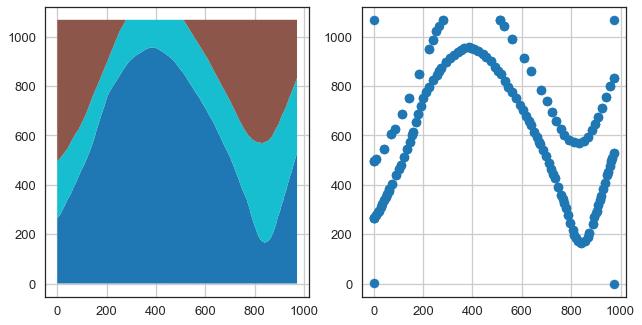

In [11]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, column='formation', aspect='equal')
ax1.grid()

gdf_xy.plot(ax=ax2, aspect='equal')
ax2.grid()

## Geometry Collections

Geometry collections contain different types of geometries. Here, a GeoDataFrame is created with one GeometryCollection object and two LineStrings.

In [12]:
from shapely.geometry import LineString
import geopandas as gpd
import gemgis as gg

line1 = LineString([(0, 0), (1, 1), (1, 2), (2, 2)])
line2 = LineString([(0, 0), (1, 1), (2, 1), (2, 2)])
collection = line1.intersection(line2)

In [13]:
type(collection)

shapely.geometry.collection.GeometryCollection

In [14]:
gdf = gpd.GeoDataFrame(geometry=[collection, line1, line2])
gdf

,geometry
0,"GEOMETRYCOLLECTION (POINT (2.00000 2.00000), L..."
1,"LINESTRING (0.00000 0.00000, 1.00000 1.00000, ..."
2,"LINESTRING (0.00000 0.00000, 1.00000 1.00000, ..."


The resulting GeoDataFrame has now an additional ``X`` and ``Y`` column. These values represent the single vertices of each Polygon. The geometry types of the shapely objects in the GeoDataFrame were converted from Polygons to Points to match the X and Y column data. The ``id`` column was dropped by default. The index of the new GeoDataFrame was reset.

**NB: By default, points within a geometry collection are dropped as they usually do not represent true layer boundaries and rather corner points.**

In [15]:
gdf_xy = gg.vector.extract_xy(gdf=gdf)

gdf_xy

,geometry,X,Y
0,POINT (0.00000 0.00000),0.00,0.00
1,POINT (1.00000 1.00000),1.00,1.00
2,POINT (0.00000 0.00000),0.00,0.00
3,POINT (1.00000 1.00000),1.00,1.00
4,POINT (1.00000 2.00000),1.00,2.00
5,POINT (2.00000 2.00000),2.00,2.00
6,POINT (0.00000 0.00000),0.00,0.00
7,POINT (1.00000 1.00000),1.00,1.00
8,POINT (2.00000 1.00000),2.00,1.00
9,POINT (2.00000 2.00000),2.00,2.00


The figures below show the original polygon data and the extracted point data with the respective X and Y data. Note the point in the upper right of the left plot which was dropped during the extraction of the vertices.


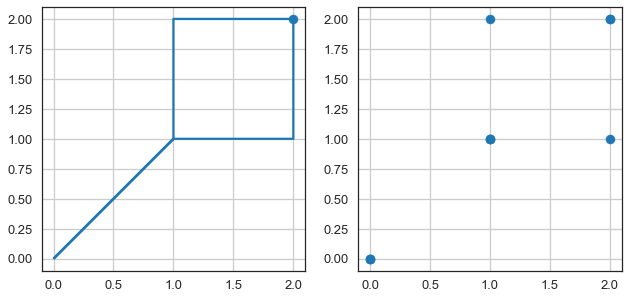

In [16]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, aspect='equal')
ax1.grid()

gdf_xy.plot(ax=ax2, aspect='equal')
ax2.grid()

## Additional Arguments

Several additional arguments can be passed to adapt the functionality of the function. For further reference, see the [API Reference for extract_xy](https://gemgis.readthedocs.io/en/latest/api_reference/vector_data.html).

* reset_index (bool)
* drop_id (bool)
* drop_level0 (bool)
* drop_level1 (bool)
* drop_index (bool)
* drop_points (bool)
* overwrite_xy (bool)
* target_crs(str, pyproj.crs.crs.CRS)
* bbox (list)

Original function with default values of arguments.

In [17]:
gdf_xy = gg.vector.extract_xy(gdf=gdf,
                              reset_index=True,
                              drop_id=True,
                              drop_level0=True,
                              drop_level1=True, 
                              drop_index=True, 
                              drop_points=True,
                              overwrite_xy=True, 
                              target_crs=gdf.crs,
                              bbox = None)

gdf_xy.head()

,geometry,X,Y
0,POINT (0.00000 0.00000),0.00,0.00
1,POINT (1.00000 1.00000),1.00,1.00
2,POINT (0.00000 0.00000),0.00,0.00
3,POINT (1.00000 1.00000),1.00,1.00
4,POINT (1.00000 2.00000),1.00,2.00


This time, the index is not reset and the id column is not dropped. 

In [18]:
gdf_xy = gg.vector.extract_xy(gdf=gdf,
                              reset_index=False,
                              drop_id=False,
                              drop_level0=True,
                              drop_level1=True, 
                              drop_index=False, 
                              drop_points=False,
                              overwrite_xy=True, 
                              target_crs=gdf.crs,
                              bbox = None)

gdf_xy.head()

geometry      points    X    Y
0 0  POINT (0.00000 0.00000)  (0.0, 0.0) 0.00 0.00
  0  POINT (1.00000 1.00000)  (1.0, 1.0) 1.00 1.00
1 0  POINT (0.00000 0.00000)  (0.0, 0.0) 0.00 0.00
  0  POINT (1.00000 1.00000)  (1.0, 1.0) 1.00 1.00
  0  POINT (1.00000 2.00000)  (1.0, 2.0) 1.00 2.00

The index is reset but the previous index columns ``level_0`` and ``level_1`` are kept.

In [19]:
gdf_xy = gg.vector.extract_xy(gdf=gdf,
                              reset_index=True,
                              drop_id=False,
                              drop_level0=False,
                              drop_level1=False, 
                              drop_index=False, 
                              drop_points=False,
                              overwrite_xy=True, 
                              target_crs=gdf.crs,
                              bbox = None)

gdf_xy.head()

,level_0,level_1,geometry,points,X,Y
0,0,0,POINT (0.00000 0.00000),"(0.0, 0.0)",0.00,0.00
1,0,0,POINT (1.00000 1.00000),"(1.0, 1.0)",1.00,1.00
2,1,0,POINT (0.00000 0.00000),"(0.0, 0.0)",0.00,0.00
3,1,0,POINT (1.00000 1.00000),"(1.0, 1.0)",1.00,1.00
4,1,0,POINT (1.00000 2.00000),"(1.0, 2.0)",1.00,2.00


## Background Functions

The function `extract_xy` is a combination of the following functions:

- `extract_xy_points`
- `extract_xy_linestrings`
- `explode_geometry_collection`
- `explode_multilinestrings`
- `explode_polygons`
- `set_dtype`

For more information of these functions see the [API Reference](https://gemgis.readthedocs.io/en/latest/api_reference/vector_data.html).